https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
def load_images_from_folder(folder, label):
    images = []
    labels = []  # Prepare a list to store the labels of the images
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize images to uniform size
            images.append(img)
            labels.append(label)
    return images, labels

# Paths to your datasets
tumor_path = 'C:/Users/HP/Desktop/PFG/CODIGO/img_png_res/TUMOR_PNG_RES'
non_tumor_path = 'C:/Users/HP/Desktop/PFG/CODIGO/img_png_res/HEALTHY_PNG_RES'

In [3]:
# Load images
tumor_images, tumor_labels = load_images_from_folder(tumor_path, 1)
non_tumor_images, non_tumor_labels = load_images_from_folder(non_tumor_path, 0)


In [4]:
# Combine datasets
images = np.array(tumor_images + non_tumor_images)
labels = np.array(tumor_labels + non_tumor_labels)

# Normalize pixel values
images = images / 255.0


In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [6]:
# Reshape for CNN input
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)


## MODELO 1

## MODELO 2

In [7]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 29s 197ms/step - accuracy: 0.6346 - loss: 0.6207 - val_accuracy: 0.7632 - val_loss: 0.5104
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 40s 189ms/step - accuracy: 0.8099 - loss: 0.4350 - val_accuracy: 0.8557 - val_loss: 0.3194
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 24s 211ms/step - accuracy: 0.8648 - loss: 0.3168 - val_accuracy: 0.9087 - val_loss: 0.2362
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 43s 223ms/step - accuracy: 0.9151 - loss: 0.2243 - val_accuracy: 0.9301 - val_loss: 0.1866
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 23s 204ms/step - accuracy: 0.9535 - loss: 0.1492 - val_accuracy: 0.9414 - val_loss: 0.1537
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 38s 173ms/step - accuracy: 0.9527 - loss: 0.1284 - val_accuracy: 0.9504 - val_loss: 0.1325
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.9706 - loss: 0.0867 - val_accuracy: 0.9572 - val_loss: 0.1078
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.9793 - loss: 0

In [9]:
import pandas as pd
hist_=pd.DataFrame(history.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.718477,0.540987,0.763247,0.510445
1,0.829337,0.393346,0.855693,0.319382
2,0.871932,0.307390,0.908681,0.236200
3,0.922708,0.209674,0.930101,0.186605
4,0.948660,0.159766,0.941375,0.153690
5,0.955148,0.129307,0.950395,0.132505
6,0.970381,0.089733,0.957159,0.107823
7,0.977997,0.070487,0.954904,0.101748
8,0.986742,0.052805,0.971815,0.074778
9,0.987870,0.038082,0.970688,0.075412


In [10]:
print("Accuracy:", history.history['accuracy'][-1])


Accuracy: 0.9878702163696289


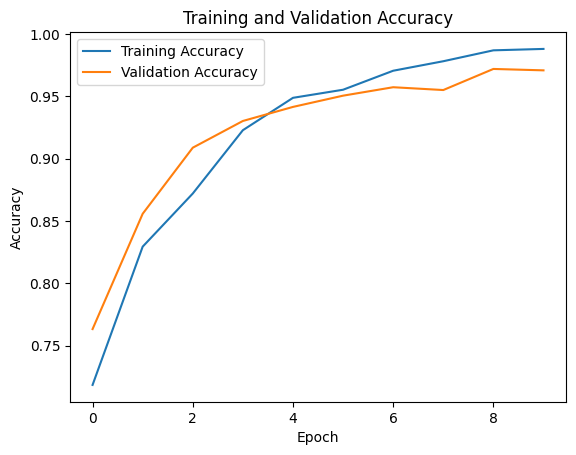

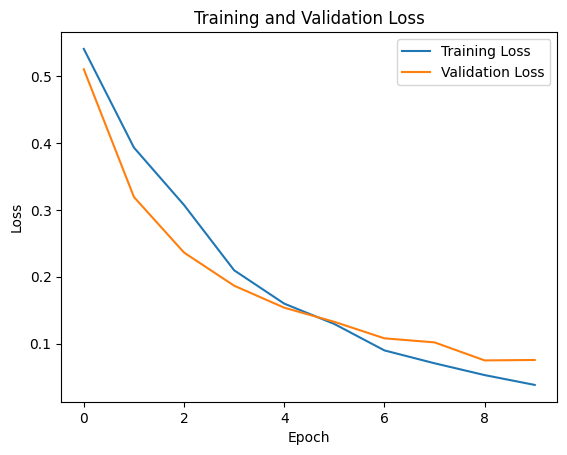

In [11]:
# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [12]:
print("Shape of X_test:", X_test.shape)
print("Data type of X_test:", X_test.dtype)

Shape of X_test: (887, 64, 64, 1)
Data type of X_test: float64


In [13]:
y_pred_prob = model.predict(X_test, verbose=1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


In [14]:
import pandas as pd

# Make predictions with verbose output
y_pred_prob = model.predict(X_test, verbose=1)

# Convert probabilities to binary labels based on a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Create a DataFrame to display actual and predicted labels
results = pd.DataFrame({
    'Etiqueta Actual': y_test.flatten(),  # Adjust according to the shape of your actual labels
    'Etiqueta Predicha': y_pred.flatten()
})

# Display the DataFrame
results


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


,Etiqueta Actual,Etiqueta Predicha
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
882,0,1
883,0,0
884,1,1
885,1,1


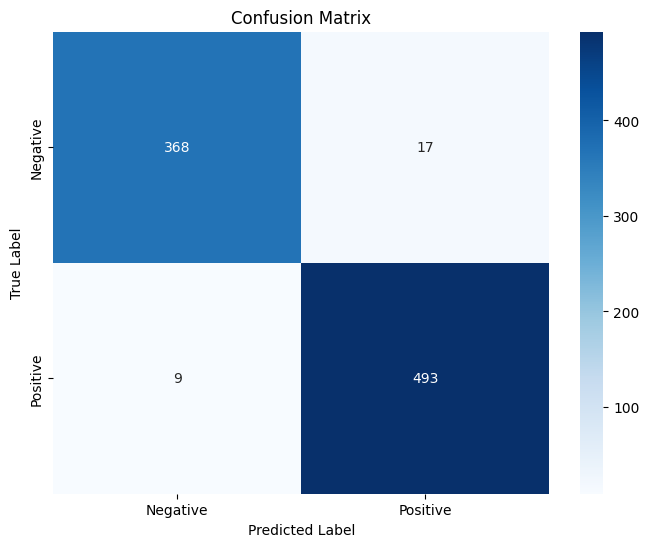

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # Optional for better visualization

# Assuming y_pred and y_test are already defined as per your previous code

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
# Define the CNN architecture
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Using sigmoid for binary classification
])

model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
history3 = model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 95s 689ms/step - accuracy: 0.6062 - loss: 0.6549 - val_accuracy: 0.7655 - val_loss: 0.5148
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 50s 376ms/step - accuracy: 0.8086 - loss: 0.4167 - val_accuracy: 0.8703 - val_loss: 0.3174
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 299ms/step - accuracy: 0.8791 - loss: 0.2986 - val_accuracy: 0.9109 - val_loss: 0.2441
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 43s 383ms/step - accuracy: 0.9284 - loss: 0.2058 - val_accuracy: 0.9042 - val_loss: 0.2408
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 45s 404ms/step - accuracy: 0.9520 - loss: 0.1292 - val_accuracy: 0.9448 - val_loss: 0.1486
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 66s 243ms/step - accuracy: 0.9703 - loss: 0.0866 - val_accuracy: 0.9493 - val_loss: 0.1408
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 46s 293ms/step - accuracy: 0.9832 - loss: 0.0501 - val_accuracy: 0.9628 - val_loss: 0.1124
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 36s 241ms/step - accuracy: 0.9913 - loss: 0

In [26]:
import pandas as pd
hist_=pd.DataFrame(history3.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.676164,0.601358,0.765502,0.514760
1,0.820592,0.394606,0.870349,0.317439
2,0.889422,0.280920,0.910936,0.244128
3,0.931453,0.192060,0.904171,0.240758
4,0.951481,0.132360,0.944758,0.148604
5,0.971227,0.085921,0.949267,0.140807
6,0.981100,0.057664,0.962796,0.112408
7,0.991537,0.032690,0.970688,0.109741
8,0.996615,0.013419,0.961669,0.138043
9,0.993512,0.019893,0.967306,0.117978


In [27]:
print("Accuracy:", history3.history['accuracy'][-1])


Accuracy: 0.993511974811554


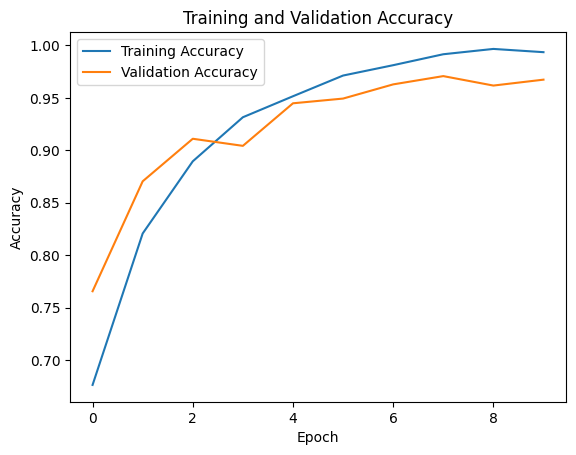

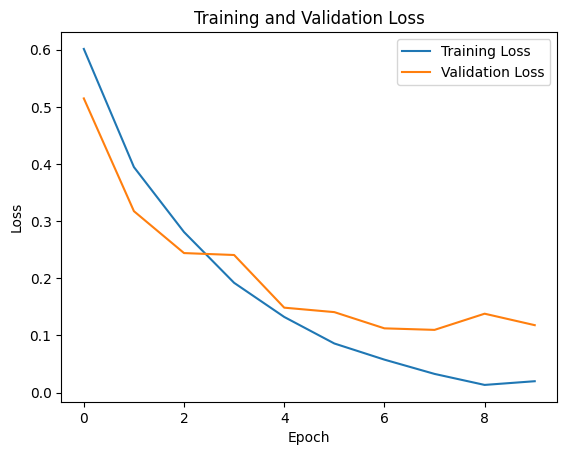

In [28]:
# Plotting the training and validation accuracy
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


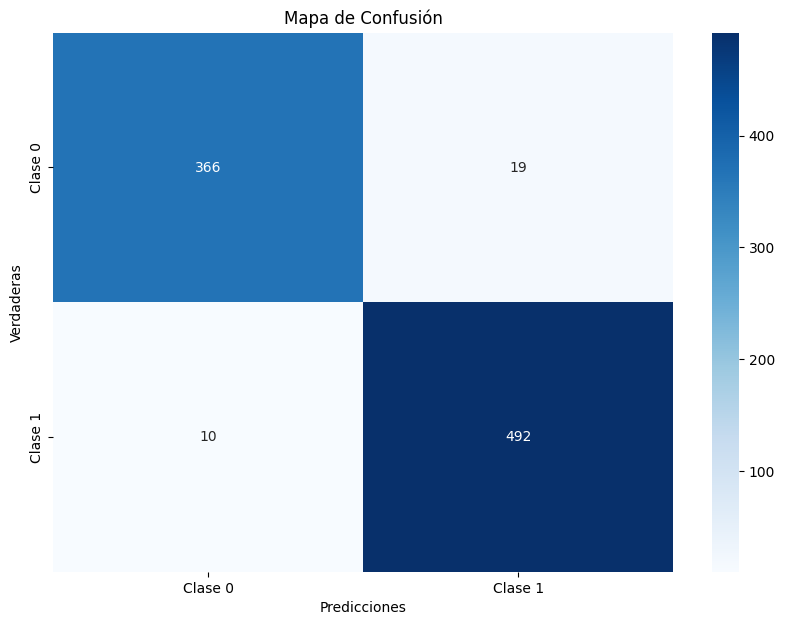

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir las etiquetas para el conjunto de datos de prueba
y_pred = model3.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convierte probabilidades a etiquetas binarias

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderas')
plt.title('Mapa de Confusión')
plt.show()


In [30]:
# Create a DataFrame to display actual and predicted labels
results = pd.DataFrame({
    'Etiqueta Actual': y_test.flatten(),  # Adjust according to the shape of your actual labels
    'Etiqueta Predicha': y_pred.flatten()
})

# Display the DataFrame
results

,Etiqueta Actual,Etiqueta Predicha
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
882,0,1
883,0,0
884,1,1
885,1,1


In [31]:
def compare_models(history1, history3, model1, model3, X_test, y_test):
    # Comparar precisión
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Modelo 1 - Precisión en Entrenamiento')
    plt.plot(history1.history['val_accuracy'], label='Modelo 1 - Precisión en Validación')
    plt.plot(history3.history['accuracy'], label='Modelo 2 - Precisión en Entrenamiento')
    plt.plot(history3.history['val_accuracy'], label='Modelo 2 - Precisión en Validación')
    plt.title('Comparación de la Precisión de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Comparar pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Modelo 1 - Pérdida en Entrenamiento')
    plt.plot(history1.history['val_loss'], label='Modelo 1 - Pérdida en Validación')
    plt.plot(history3.history['loss'], label='Modelo 2 - Pérdida en Entrenamiento')
    plt.plot(history3.history['val_loss'], label='Modelo 2 - Pérdida en Validación')
    plt.title('Comparación de la Pérdida de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluación en el conjunto de prueba
    score1 = model1.evaluate(X_test, y_test, verbose=0)
    score2 = model3.evaluate(X_test, y_test, verbose=0)
    print(f"Modelo 1 - Pérdida: {score1[0]}, Precisión: {score1[1]}")
    print(f"Modelo 2 - Pérdida: {score2[0]}, Precisión: {score2[1]}")


In [32]:
def compare_models(history1, history3, model1, model3, X_test, y_test):
    # Comparar precisión
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label='Modelo 1 - Precisión en Entrenamiento')
    plt.plot(history1.history['val_accuracy'], label='Modelo 1 - Precisión en Validación')
    plt.plot(history3.history['accuracy'], label='Modelo 2 - Precisión en Entrenamiento')
    plt.plot(history3.history['val_accuracy'], label='Modelo 2 - Precisión en Validación')
    plt.title('Comparación de la Precisión de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Comparar pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label='Modelo 1 - Pérdida en Entrenamiento')
    plt.plot(history1.history['val_loss'], label='Modelo 1 - Pérdida en Validación')
    plt.plot(history3.history['loss'], label='Modelo 2 - Pérdida en Entrenamiento')
    plt.plot(history3.history['val_loss'], label='Modelo 2 - Pérdida en Validación')
    plt.title('Comparación de la Pérdida de los Modelos')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluación en el conjunto de prueba
    score1 = model1.evaluate(X_test, y_test, verbose=0)
    score2 = model3.evaluate(X_test, y_test, verbose=0)
    print(f"Modelo 1 - Pérdida: {score1[0]}, Precisión: {score1[1]}")
    print(f"Modelo 2 - Pérdida: {score2[0]}, Precisión: {score2[1]}")


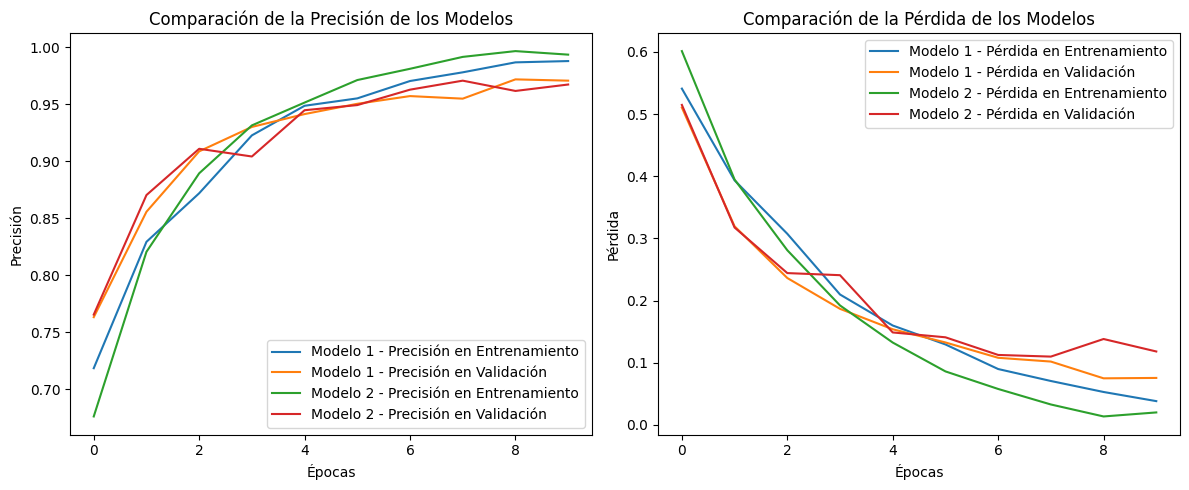

Modelo 1 - Pérdida: 0.075412318110466, Precisión: 0.9706876873970032
Modelo 2 - Pérdida: 0.11797823011875153, Precisión: 0.9673055410385132


In [33]:
compare_models(history, history3, model, model3, X_test, y_test)

In [34]:
import cv2
import numpy as np

def prepare_image(image_path):
    """Prepara una imagen para ser evaluada por el modelo CNN."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (64, 64))  # Redimensiona la imagen a 64x64
        img = img / 255.0  # Normaliza los valores de los píxeles
        img = np.expand_dims(img, axis=-1)  # Añade una dimensión de canal
        img = np.expand_dims(img, axis=0)  # Añade una dimensión de lote
        return img
    else:
        return None


In [35]:
def predict_tumor_model1(image_path, model):
    """Determina si la imagen contiene un tumor utilizando el modelo CNN."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model.predict(img)
        return "Tumor" if prediction[0][0] > 0.5 else "No Tumor"
    else:
        return "La imagen no se encontró o no pudo leerse"


In [36]:
# Cargar el modelo entrenado (asegúrate de que el modelo está correctamente cargado)
# model = cargar_tu_modelo()  # Asume que tienes una función para cargar el modelo

# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png'

# Hacer la predicción
result = predict_tumor_model1(image_path, model)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
No Tumor


In [37]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO.png'

# Hacer la predicción
result = predict_tumor_model1(image_path, model)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Tumor


In [38]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO 1.png'

# Hacer la predicción
result = predict_tumor_model1(image_path, model)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Tumor


In [39]:
def predict_tumor_with_prob_model1(image_path, model):
    """Determina si la imagen contiene un tumor y devuelve la probabilidad de la predicción."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model.predict(img)
        probability = prediction[0][0]
        return ("Tumor", probability) if probability > 0.5 else ("No Tumor", 1 - probability)
    else:
        return ("La imagen no se encontró o no pudo leerse", None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


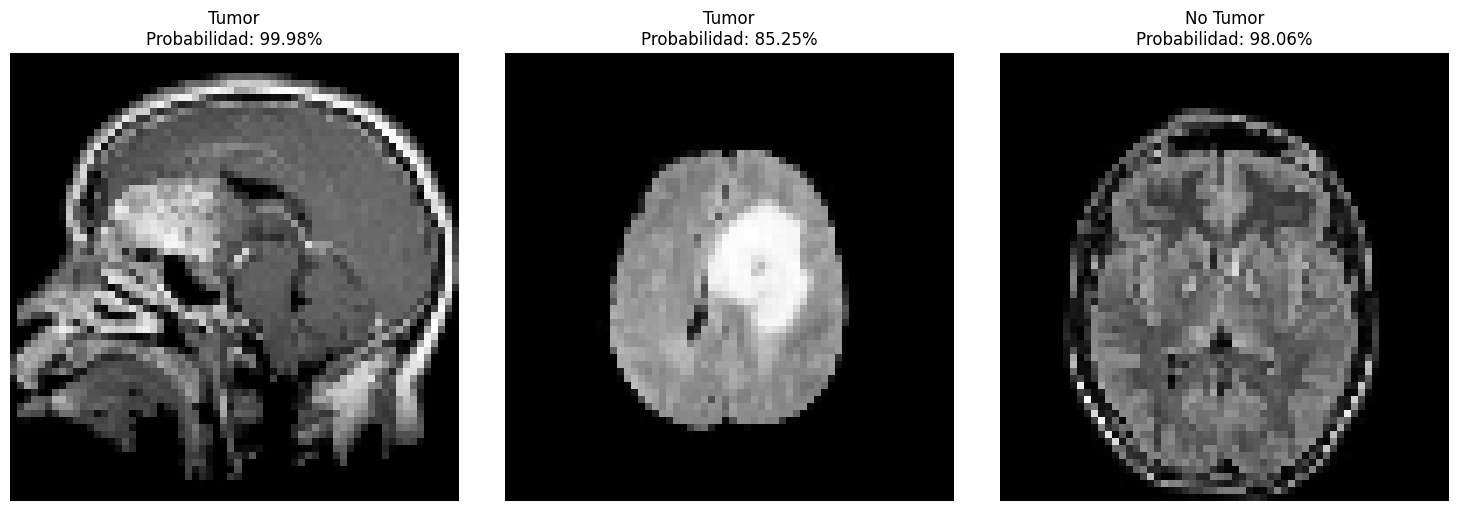

In [40]:
import matplotlib.pyplot as plt

# Rutas de las imágenes
image_paths = [
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO 1.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png'
]

# Cargar modelo
# model = cargar_tu_modelo()  # Asume que tienes una función para cargar el modelo

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Procesar cada imagen y mostrar
for ax, image_path in zip(axes, image_paths):
    label, prob = predict_tumor_with_prob_model1(image_path, model)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # Asegura que todas las imágenes se muestren al mismo tamaño
    
    ax.imshow(img, cmap='gray')
    ax.title.set_text(f'{label}\nProbabilidad: {prob:.2%}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [41]:
def predict_tumor_model2(image_path, model3):
    """Determina si la imagen contiene un tumor utilizando el modelo CNN."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model3.predict(img)
        return "Tumor" if prediction[0][0] > 0.5 else "No Tumor"
    else:
        return "La imagen no se encontró o no pudo leerse"

In [42]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png'

# Hacer la predicción
result = predict_tumor_model2(image_path, model3)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
No Tumor


In [43]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO.png'

# Hacer la predicción
result = predict_tumor_model2(image_path, model3)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Tumor


In [44]:
# Ruta de la imagen a evaluar
image_path = 'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO 1.png'

# Hacer la predicción
result = predict_tumor_model2(image_path, model3)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Tumor


In [45]:
def predict_tumor_with_prob_model2(image_path, model3):
    """Determina si la imagen contiene un tumor y devuelve la probabilidad de la predicción."""
    img = prepare_image(image_path)
    if img is not None:
        prediction = model3.predict(img)
        probability = prediction[0][0]
        return ("Tumor", probability) if probability > 0.5 else ("No Tumor", 1 - probability)
    else:
        return ("La imagen no se encontró o no pudo leerse", None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


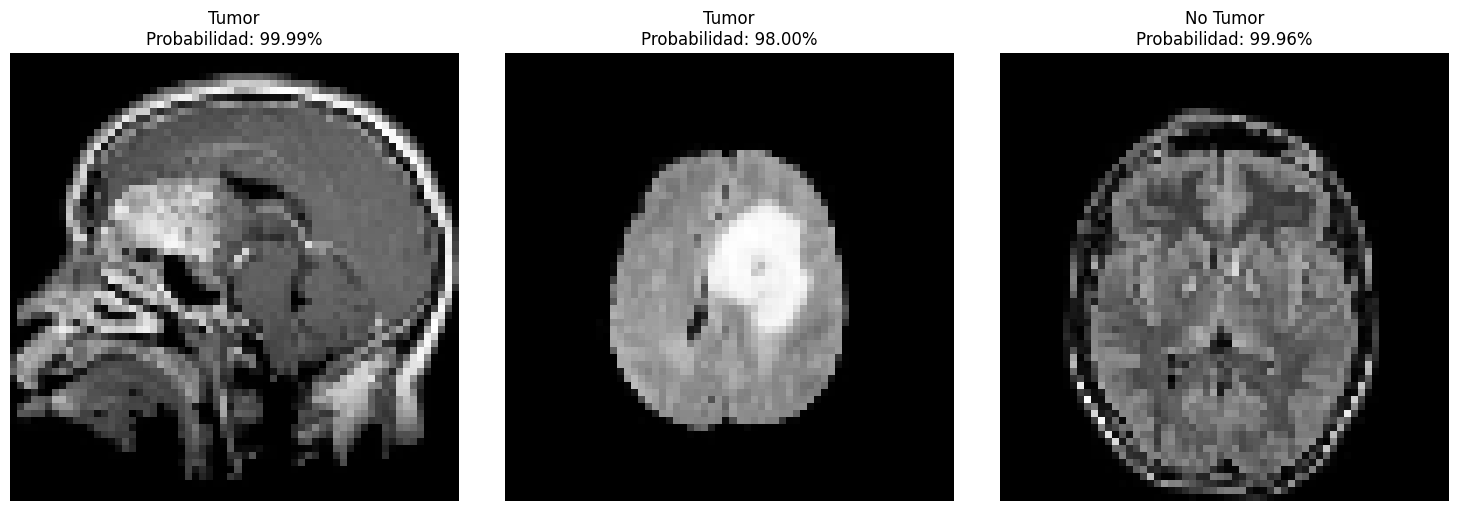

In [46]:
import matplotlib.pyplot as plt

# Rutas de las imágenes
image_paths = [
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO 1.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA CANCER O NO.png',
    'C:/Users/HP/Desktop/PFG/CODIGO/PRUEBA NO CANCER.png'
]

# Cargar modelo
# model = cargar_tu_modelo()  # Asume que tienes una función para cargar el modelo

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Procesar cada imagen y mostrar
for ax, image_path in zip(axes, image_paths):
    label, prob = predict_tumor_with_prob_model1(image_path, model3)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # Asegura que todas las imágenes se muestren al mismo tamaño
    
    ax.imshow(img, cmap='gray')
    ax.title.set_text(f'{label}\nProbabilidad: {prob:.2%}')
    ax.axis('off')

plt.tight_layout()
plt.show()